epoch: 0.0 train acc: 0.15701666666666667 test acc: 0.1614
epoch: 1.0 train acc: 0.9021833333333333 test acc: 0.9077
epoch: 2.0 train acc: 0.9261166666666667 test acc: 0.922
epoch: 3.0 train acc: 0.9306333333333333 test acc: 0.9304
epoch: 4.0 train acc: 0.93625 test acc: 0.9335
epoch: 5.0 train acc: 0.9397 test acc: 0.9378
epoch: 6.0 train acc: 0.9398 test acc: 0.9351
epoch: 7.0 train acc: 0.9401166666666667 test acc: 0.9324
epoch: 8.0 train acc: 0.9455666666666667 test acc: 0.9354
epoch: 9.0 train acc: 0.9445333333333333 test acc: 0.9404
epoch: 10.0 train acc: 0.94675 test acc: 0.9408
epoch: 11.0 train acc: 0.9487166666666667 test acc: 0.942
epoch: 12.0 train acc: 0.9460166666666666 test acc: 0.9384
epoch: 13.0 train acc: 0.94765 test acc: 0.9392
epoch: 14.0 train acc: 0.9517166666666667 test acc: 0.9435
epoch: 15.0 train acc: 0.95205 test acc: 0.9451
epoch: 16.0 train acc: 0.9527 test acc: 0.943


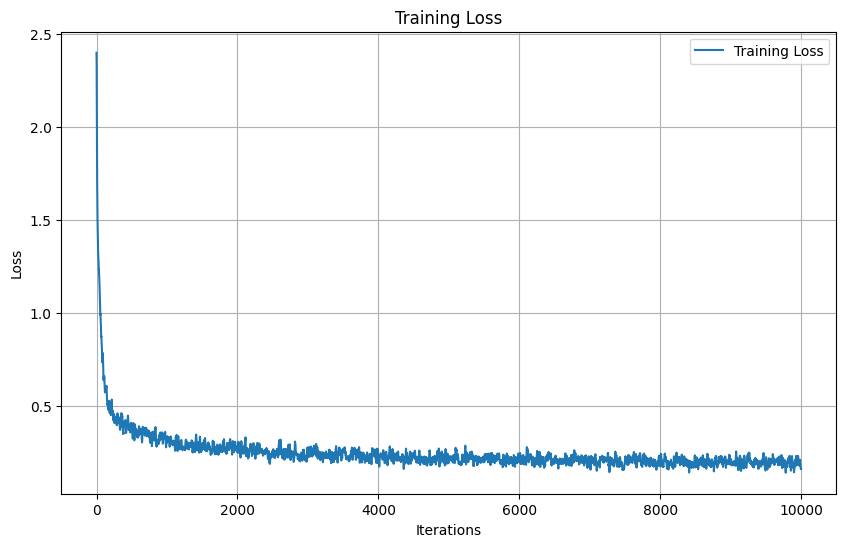

최종 훈련 데이터 정확도: 0.9527
최종 테스트 데이터 정확도: 0.943


In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net1 import TwoLayerNet
from common.optimizer import Adam
import matplotlib.pyplot as plt
from common.util import smooth_curve
from common.layers import BatchNormalization

# MNIST 데이터셋 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 신경망 생성 (Affine 계층을 3층으로 변경)
input_size = 784
hidden_size1 = 15  # 은닉층 노드 수 12으로 설정
hidden_size2 = 15
hidden_size3 = 15
output_size = 10
network = TwoLayerNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
# BatchNormalization 레이어 추가
network.layers['BatchNorm1'] = BatchNormalization(gamma=2.0, beta=0.0)  # 은닉층에 BatchNormalization 레이어 추가
network.layers['BatchNorm2'] = BatchNormalization(gamma=2.0, beta=0.0)  
network.layers['BatchNorm3'] = BatchNormalization(gamma=2.0, beta=0.0)  
# Adam optimizer 생성 (학습률 0.01로 설정)
optimizer = Adam(lr=0.019, beta1=0.9, beta2=0.999, weight_decay=0.0)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기

# 학습 경과 기록
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grads = network.gradient(x_batch, t_batch)

    # 가중치 업데이트
    optimizer.update(network.params, grads)

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭마다 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("epoch:", i // iter_per_epoch, "train acc:", train_acc, "test acc:", test_acc)

# 학습 진행 상황 그래프 그리기
iterations = range(0, iters_num)
plt.figure(figsize=(10, 6))
plt.plot(iterations, smooth_curve(train_loss_list), label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("최종 훈련 데이터 정확도:", train_acc_list[-1])
print("최종 테스트 데이터 정확도:", test_acc_list[-1])